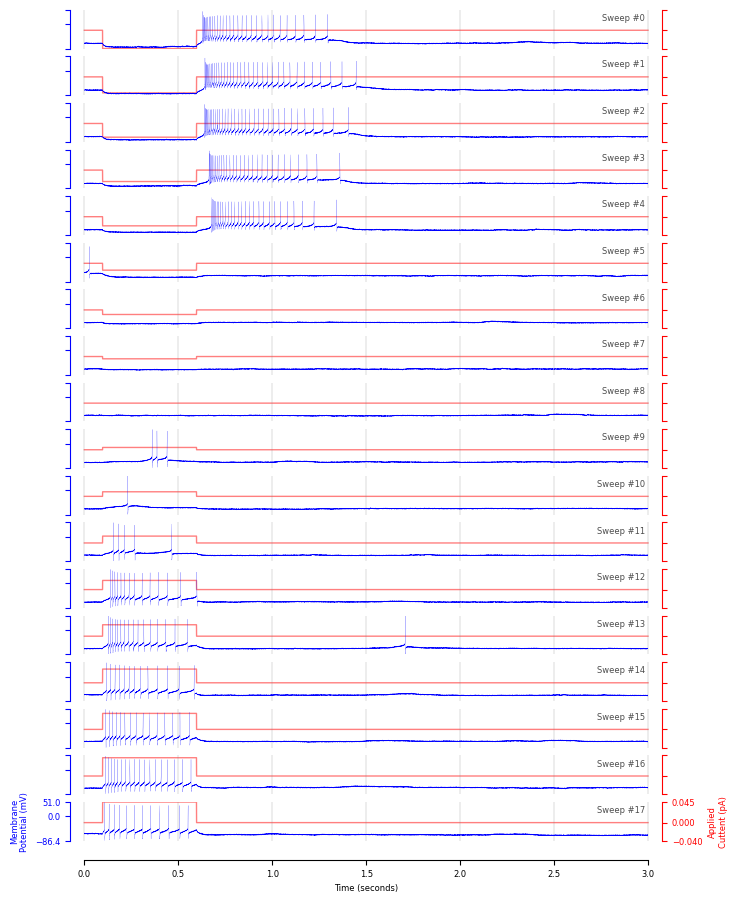

In [9]:
import pyabf
import pyabf.plot
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier ABF
file_path = "abf_data/Cell1_CC_LHb/23615008.abf"
abf = pyabf.ABF(file_path)

# Paramètres de style
fig_width, fig_height = 8, 0.6
y_label_font_size = 6
adc_lw, dac_lw = 0.1, 1
adc_col, dac_col = 'b', 'r'
tick_label_font_size = 6

# Initialiser les variables de min/max globaux
c_min, c_max = float('inf'), float('-inf')
y_min, y_max = float('inf'), float('-inf')

# Parcourir tous les balayages pour trouver les valeurs globales
for sweep in range(abf.sweepCount):
    abf.setSweep(sweep)
    c_min = min(c_min, min(abf.sweepC))
    c_max = max(c_max, max(abf.sweepC))
    y_min = min(y_min, min(abf.sweepY))
    y_max = max(y_max, max(abf.sweepY))

# Définir t_min et t_max basés sur le premier balayage (ils ne changent pas)
t_min, t_max = abf.sweepX[0], abf.sweepX[-1] 

# Créer une figure avec des sous-figures verticales pour chaque balayage
#   je rajoute un subplot pour tracer l'axe des x (temps)
fig, axes = plt.subplots(abf.sweepCount+1, 1, 
                         figsize=(fig_width, fig_height * (abf.sweepCount+1)), sharex=True)



for sweep in range(abf.sweepCount):

    #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

    abf.setSweep(sweep)  # set the sweep
    ax1 = axes[sweep]

    # --- ax1 ----------------------------------------------------------

    # Tracer la courbe enregistrée (ADC) sur l'axe de gauche
    ax1.plot(abf.sweepX, abf.sweepY, color=adc_col, lw=adc_lw)
    ax1.tick_params(axis='y', labelcolor=adc_col, color=adc_col, labelsize=tick_label_font_size)
    ax1.set_xlabel(abf.sweepLabelX)

    # Définir les valeurs des ticks y pour l'axe gauche
    ticks_left = [tick for tick in [y_min, 0, y_max] if y_min <= tick <= y_max]
    ax1.set_yticks(ticks_left)

    # Spines
    ax1.spines['left'].set_color(adc_col)                     # spine gauche bleu
    ax1.spines[['right', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax1.spines['left'].set_bounds(y_min, y_max)               # bornes du spine

    # Sweep number
    sweep_text = f"Sweep #{abf.sweepNumber}"
    ax1.text(0.95, 0.9, sweep_text, transform=ax1.transAxes,
         fontsize=tick_label_font_size, color='k', ha='right', va='top', alpha=0.7)
   
    ax1.set_ylim(y_min, y_max)

    # --- ax2 ----------------------------------------------------------

    # Créer un second axe y pour la courbe de commande (DAC)
    ax2 = ax1.twinx()
    ax2.plot(abf.sweepX, abf.sweepC, color=dac_col, lw=dac_lw, alpha=0.5)
    ax2.tick_params(axis='y', labelcolor=dac_col, color=dac_col, labelsize=tick_label_font_size)

    # Définir les valeurs des ticks y pour l'axe droit
    ticks_right = [tick for tick in [c_min, 0, c_max] if c_min <= tick <= c_max]
    ax2.set_yticks(ticks_right)

    # Spines
    ax2.spines['right'].set_color(dac_col)                   # spine droit rouge
    ax2.spines[['left', 'top', 'bottom']].set_visible(False) # les autres non visibles
    ax2.spines['right'].set_bounds(c_min, c_max)             # les bornes des spines
    ax2.spines['bottom'].set_bounds(t_min, t_max)            # 
    #ax2.spines['bottom'].set_visible(False)
    ax1.xaxis.set_visible(False)
    ax1.set_xlabel("")                 # no xlabel (ici "Time (seconds)")
    ax1.set_xticks([])                 # Hide x-ticks for all but the last sweep

    ax2.set_ylim(c_min, c_max)
    ax1.set_ylim(y_min, y_max)

    # Only the last sweep with y labels
    if sweep < abf.sweepCount-1:
        # no ylabels left & right
        ax1.set_yticklabels([])
        ax2.set_yticklabels([])
    else:
        # ylabels
        ax1.set_ylabel(f"Membrane\nPotential (mV)", color=adc_col, fontsize=y_label_font_size)
        ax2.set_ylabel(f"Applied\nCuttent (pA)",    color=dac_col, fontsize=y_label_font_size)

    # Améliorer la mise en page
    ax1.spines['left'].set_position(('outward', -10))
    ax2.spines['right'].set_position(('outward', -10))

    x_positions = np.linspace(t_min, t_max, 7)  # Adjust the start, end, and number of lines as needed
    for x in x_positions:
        ax1.vlines(x, ymin=y_min, ymax=y_max, color='gray', linestyle='-', linewidth=0.2, zorder=0)

    ax1.set_zorder(2)
    ax2.set_zorder(1)
    ax1.patch.set_visible(False)

    #>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# --- Access the last subplot ------------------------------------------

ax_last = axes[abf.sweepCount]
#ax_last.plot(abf.sweepX, abf.sweepY, color=adc_col, lw=adc_lw)


ax_last.spines[['top','left','right']].set_visible(False)
# Set x-axis label for the last subplot
ax_last.set_xlabel(abf.sweepLabelX, fontsize=6)

# Display only x-ticks and remove y-ticks
ax_last.tick_params(axis='x', labelsize=tick_label_font_size)
ax_last.tick_params(axis='y', left=False, labelleft=False)  # Hide y-axis ticks and labels

# Optional: add minor ticks to make the axis look cleaner (remove if not needed)
ax_last.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
ax_last.xaxis.set_tick_params(which='minor', bottom=True)

ax_last.spines['bottom'].set_bounds(t_min, t_max)
ax_last.spines['bottom'].set_position(('outward', -20))  # Décale l'axe x de 10 points vers le bas

custom_xticks = np.linspace(t_min, t_max, num=7)  # Example x-ticks positions
ax_last.set_xticks(custom_xticks)
ax_last.set_xticklabels([f"{tick:.1f}" for tick in custom_xticks], fontsize=tick_label_font_size)  # Custom labels



plt.show()
